# Jupyter Notebook UI to graph your speed trace (with opto) data!

Version 1.3 - Joseph Liang, Rankin Lab
Updated:
1. Upgraded folder path selection application
2. Upgraded dataset management (less moving parts for end-user)
3. output changed from tif -> png

## Known bug: Step 2 an empty windows displays in Mac. May also apply to linux/windows.

## Beginner Essentials:
1. Shift-Enter to run each cell. After you run, you should see an output "done step #". If not, an error has occured
2. When inputting your own code/revising the code, make sure you close all your quotation marks '' and brackets (), [], {}.
3. Don't leave any commas (,) hanging! (make sure an object always follows a comma. If there is nothing after a comma, remove the comma!
4. Learning to code? Each line of code is annotated to help you understand how this code works!

## 3. Run all cells/steps sequentially, even the ones that do not require input

## Steps that require input: #3, #6.1, #7

# 1. Importing Packages Required (No input required, just run)

In [1]:
import pandas as pd #<- package used to import and organize data
import numpy as np #<- package used to import and organize data
import seaborn as sns #<- package used to plot graphs
from matplotlib import pyplot as plt #<- package used to plot graphs
import os #<- package used to work with system filepaths
from ipywidgets import widgets #<- widget tool to generate button
from IPython.display import display #<- displays button
from tkinter import Tk, filedialog #<- Tkinter is a GUI package
print("done step 1")

done step 1


# 2. Pick filepath (just run and click button)

Run the following cell and clicke the button 'Select Folder' to pick a filepath.

## Important: Later on, this script uses the total file path for each file to import and group data. That means if your folder has whatever your strain is named, the script will not work.

(ex. if your folder has "N2" in it this script sees all files inside this folder as having the "N2" search key)

## An easy fix is to just rename your folder to something else (make your strains lower-case, or just have the date)

In [2]:
### Select Folder App - After you run, you can select your folder for filepath
button = widgets.Button(description = 'Select Folder') #<- creates a button variable
display(button) #<- displays the button in output

def select_folder(b): #<- defines an action. This action requires a variable, so an arbitrary one 'b' is there
    global folder_path #<- sets a variable as a global variable, not just within this action
    #Tk().withdraw() #<- Tkinter likes to create annoying empty windows. This removes them
    folder_path = filedialog.askdirectory() #<- Opens up a file explorer window, and determines folder path
    #Tk().update() #<- below
    #Tk().destroy() #<- this and the line above it removes the file explorer window after a selection is made
    print(folder_path) #<- this helps confirm that this action was performed
    print('done step 2')
button.on_click(select_folder)

Button(description='Select Folder', style=ButtonStyle())

/Users/Joseph/Desktop/WT_cat2_pink1_pdr1_Day3_Innate_05_12_2022
done step 2


# 3. User Defined Variables (Add input here)

Here, we add some constants to help you blaze through this code.

## 3.1: Setting time bins
pretty self explanatory



## 3.2: Setting view range for your graph
Top, bottom = y axis view range
left, right = x axis view range



In [31]:
# Setting 1s Bins: for 0.5s Bins: 0,360,721
# bins = np.linspace(0,360,721) #<- np.linspace(start, end, steps in between)
# bins = np.linspace(0,420,841) #<- np.linspace(start, end, steps in between)
bins = np.linspace(0,420,421)
print(bins)


print("done step 3")

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

# 4. Construct filelist from folder path (No input required, just run)

In [4]:
#folder_path = '/Users/Joseph/Desktop/lrk1_ATR_NoATR_08_15_2019'
print(folder_path)
os.chdir(folder_path) #<- setting your working directory so that your images will be saved here

filelist = list() #<- empty list
for root, dirs, files in os.walk(folder_path): #<- this for loop goes through your folder 
    for name in files:
        if name.endswith('.dat'): #<- and takes out all files with a .dat (file that contains your data)
            filepath = os.path.join(root, name) #<- Notes down the file path of each data file
            filelist.append(filepath) #<- saves it into the list
    
print(filelist)
print('done step 4')

/Users/Joseph/Desktop/WT_cat2_pink1_pdr1_Day3_Innate_05_12_2022
['/Users/Joseph/Desktop/WT_cat2_pink1_pdr1_Day3_Innate_05_12_2022/FX01779_OffFood/20220512_165407/FX01779_6x2_n72h20C_420s_innate_A0512_NF5.00121.dat', '/Users/Joseph/Desktop/WT_cat2_pink1_pdr1_Day3_Innate_05_12_2022/FX01779_OffFood/20220512_165407/FX01779_6x2_n72h20C_420s_innate_A0512_NF5.00120.dat', '/Users/Joseph/Desktop/WT_cat2_pink1_pdr1_Day3_Innate_05_12_2022/FX01779_OffFood/20220512_165407/FX01779_6x2_n72h20C_420s_innate_A0512_NF5.00450.dat', '/Users/Joseph/Desktop/WT_cat2_pink1_pdr1_Day3_Innate_05_12_2022/FX01779_OffFood/20220512_165407/FX01779_6x2_n72h20C_420s_innate_A0512_NF5.00452.dat', '/Users/Joseph/Desktop/WT_cat2_pink1_pdr1_Day3_Innate_05_12_2022/FX01779_OffFood/20220512_165407/FX01779_6x2_n72h20C_420s_innate_A0512_NF5.00240.dat', '/Users/Joseph/Desktop/WT_cat2_pink1_pdr1_Day3_Innate_05_12_2022/FX01779_OffFood/20220512_165407/FX01779_6x2_n72h20C_420s_innate_A0512_NF5.00453.dat', '/Users/Joseph/Desktop/WT_cat

# 5. Process Data Function (No input required, just run)

In [5]:
def ProcessData(strain): #<- an example of a user-defined function
    strain_filelist = []  #<- empty list
    for i in filelist: #<- goes through the list and filters for keyword
        if strain in i:
            strain_filelist.append(i)
    Strain_N = len(strain_filelist) #<- N per strain, or number of plates
    print(f'This Strain has {Strain_N} worms tracked') #<- prints out number of plates per strain
    for i, f in enumerate(strain_filelist, start=1): #<- a progress bar function integrated into data import
        N = len(strain_filelist)
        statement = f"Processing {i} of {N} worms" #<- progress bar statement
        DF_Read = pd.read_csv(f, sep=' ', skiprows = 0, header = None) #<- imports and cleans data
        if i==1:
            DF_Total = DF_Read
#             DF_Total = DF_Total.dropna(axis=0)
            DF_Total["worm"]=i
            DF_Total["x_0"] = DF_Total.iloc[:,2] - DF_Total.iloc[0,2]
            DF_Total["y_0"] = DF_Total.iloc[:,3] - DF_Total.iloc[0,3]
            pathlen_i = np.array(DF_Total.iloc[1:,5])
            pathlen_i_1 = np.array(DF_Total.iloc[0:-1,5])
            result = np.abs(pathlen_i - pathlen_i_1).tolist()
            result.insert(0,0)
            resultS=pd.Series(result)
            DF_Total["distance"]=resultS.cumsum()
        else:
            DF_Add = DF_Read
#             DF_Add = DF_Add.dropna(axis=0)
            DF_Add["worm"]=i
            DF_Add["x_0"] = DF_Add.iloc[:,2] - DF_Add.iloc[0,2]
            DF_Add["y_0"] = DF_Add.iloc[:,3] - DF_Add.iloc[0,3]
            pathlen_i = np.array(DF_Add.iloc[1:,5])
            pathlen_i_1 = np.array(DF_Add.iloc[0:-1,5])
            result = np.abs(pathlen_i - pathlen_i_1).tolist()
            result.insert(0,0)
            resultS=pd.Series(result)
            DF_Add["distance"]=resultS.cumsum()
            DF_Total = pd.concat((DF_Total, DF_Add), ignore_index = False)  #<- imports and cleans data
        print(statement)
#     DF_Total = DF_Total.dropna(axis = 0) #<- more data cleaning
    DF_Total = DF_Total.rename( #<- more data cleaning
                {0:'time',
                1:'speed',
                2: "x",
                3: "y",
                4: "angularspeed",
                5: "pathlength",
                6: "kink",
                7: "bias",
                8: "curve",
                9: "dir",
                10: "crab",
                11: "length",
                12: "midline",
                13: "width",
                14: "morphwidth",
                15: "area"
                }, axis=1)

    #0.5s Bins
    Bins = [float(i) for i in bins] #<- adds time bins into the data frame
    DF_Total['time_bin'] = pd.cut(DF_Total['time'], Bins, labels = Bins[1:])
#     DF_Speed_DF = DF_Total[["time", "time_bin", "speed", "x", "y", "x_0","y_0", "pathlength", "worm"]].copy()
    
    return{
            'N': Strain_N,
            'Confirm':DF_Total,
#             'Speed_DF': DF_Speed_DF, #<- this is the finished product we will use for analysis
            'Filelist':strain_filelist} 

print('done step 5')

done step 5


# 6.1 Processing Data (Please Read, Input Here)

Here is the hardest part - From your naming convention, you need to pick a unique identifier for each group.

This means that all of names of your files for that strain should have that in common but is not commone with across all other files! If you did a good job naming your files and following a good naming convention, this should be easy.

## Be careful and really look hard in your naming structure. Note you want an unique identifier in the entire file path for the same group of files. An easy mistake is to have the strain name in the folder name, in this case if you use your strain name as a keyword it would include all files in that folder!

For example, if all your N2 files have a certain pattern like "N2_5x4" in this following example:
'/Users/Joseph/Desktop/AVR14_10sISI_TapHab_0710_2019/N2/20190710_141740/N2_5x4_f94h20c_100s30x10s10s_C0710ab.trv'

Then you need to set that identifier for the strain keyword:
'Strain_1' = 'N2_5x4'

In the same example, if the identifier for your second strain is 'AVR14', then the N2 files will also be included, as this identifier can also be found in this file path.

## Depending on how many strains you are running for comparison, you may need to add/delete some lines.

You are not naming your data groups here, we have a step for that later.
## Here, you want to note down ALL the strains you have in the folder

If you have just 2 strains, add hashtags (#) in front of the lines you do not need.
If you need more strains, just add more lines, following the same format!

In [6]:
#Format: Strain_# = 'unique_identifier'

### Make into dictionary
StrainNames = {
    'Strain_1' : 'N2_OffFood',   #<- each strain will be designated to a unique identifier here
    'Strain_2' : 'N2_OnFood',
    'Strain_3' : 'CB1112_OffFood',
    'Strain_4' : 'CB1112_OnFood',
    'Strain_5' : 'FX01779_OffFood',
    'Strain_6' : 'FX01779_OnFood',
    'Strain_7' : 'VC1024_OffFood',
    'Strain_8' : 'VC1024_OnFood',
#     'Strain_9' : 'LX636_NoFood',  #<- empty entries are for those hardcore trackers that tracking this many strains
#     'Strain_10' : 'LX636_Food',
#     'Strain_11' : '',
#     'Strain_12' : '',
#     'Strain_13' : '',
#     'Strain_14' : '',
#     'Strain_15' : '',
}
#...etc, etc

print('done step 6.1')

done step 6.1


# Cell below is to run testing/debugging. Do not need to run (commented out)

In [ ]:


# DF_Read = pd.read_csv('/Users/Joseph/Desktop/innate_slowing_response_cat2_wt_03_17_22_new/N2_NoFood/20220317_162331/N2_6x2_n96h20C_360s_innate_A0317_NN4.00363.dat'
#                       , sep=' ', header = None) #<- imports and cleans data
# DF_Read["worm"]=1
# # print(DF_Read)
# # DF_Total = DF_Read.dropna(axis = 0) #<- more data cleaning
# DF_Total = DF_Read.rename( #<- more data cleaning
#             {0:'time',
#             1:'speed',
#             2: "x",
#             3: "y",
#             4: "angularspeed",
#             5: "pathlength",
#             6: "kink",
#             7: "bias",
#             8: "curve",
#             9: "dir",
#             10: "crab"}, axis=1)
# DF_Total["x_0"] = DF_Total.x - DF_Total.x.iloc[0]
# DF_Total["y_0"] = DF_Total.y - DF_Total.y.iloc[0]

# DF_Total["x_test"] = DF_Total.iloc[:,2] - DF_Total.iloc[0,2]
# DF_Total["y_test"] = DF_Total.iloc[:,3] - DF_Total.iloc[0,3]
# DF_Total["distance"]= 0
# print(DF_Total)

# A_i = np.array(DF_Total['pathlength'][1:])
# A_i_1 = np.array(DF_Total['pathlength'][0:-1])
# result = np.abs(A_i - A_i_1).tolist()
# result.insert(0,0)
# curr_sum = 0
# new_list = []
# for i in range(len(result)):
#     curr_sum += result[i]
#     new_list.append(curr_sum)
# DF_Total["distance"]=new_list
# print(DF_Total)



        


# A_i = np.array(DF_Total.iloc[1:,5])
# A_i_1 = np.array(DF_Total.iloc[0:-1,5])
# result = np.abs(A_i - A_i_1).tolist()
# result.insert(0,0)
# curr_sum = 0
# new_list = []
# for i in range(len(result)):
#     curr_sum += result[i]
#     new_list.append(curr_sum)
# print(A_i)
# print(A_i_1)
# print(len(A_i))
# print(len(A_i_1))
# # resultS=pd.Series(result)
# # print(resultS.cumsum())
# # print(new_list)

# curr_sum = 0
# new_list = []
# for i in range(len(result)):
#     curr_sum += result[i]
#     new_list.append(curr_sum)
    
    
# import matplotlib.pyplot as plt
# plt.plot(new_list)

# 6.2 Process Data (just run this cell)

In [32]:
DataLists = [0] #<- generates empty list. 0 is there to account for python's index starting at 0. 
# we want indexing to start at 1 (when I say #1 I want the first point, not the second point)

for s in StrainNames.values(): #<- goes through the dictionary in step 6.1 and processes data
    if not s == '':
        DataLists.append(ProcessData(s)['Confirm']) #<- appends all data into a list of dataframes
# print(DataLists[2])
print('done step 6.2')

This Strain has 164 worms tracked
Processing 1 of 164 worms
Processing 2 of 164 worms
Processing 3 of 164 worms
Processing 4 of 164 worms
Processing 5 of 164 worms
Processing 6 of 164 worms
Processing 7 of 164 worms
Processing 8 of 164 worms
Processing 9 of 164 worms
Processing 10 of 164 worms
Processing 11 of 164 worms
Processing 12 of 164 worms
Processing 13 of 164 worms
Processing 14 of 164 worms
Processing 15 of 164 worms
Processing 16 of 164 worms
Processing 17 of 164 worms
Processing 18 of 164 worms
Processing 19 of 164 worms
Processing 20 of 164 worms
Processing 21 of 164 worms
Processing 22 of 164 worms
Processing 23 of 164 worms
Processing 24 of 164 worms
Processing 25 of 164 worms
Processing 26 of 164 worms
Processing 27 of 164 worms
Processing 28 of 164 worms
Processing 29 of 164 worms
Processing 30 of 164 worms
Processing 31 of 164 worms
Processing 32 of 164 worms
Processing 33 of 164 worms
Processing 34 of 164 worms
Processing 35 of 164 worms
Processing 36 of 164 worms
Pro

Processing 136 of 201 worms
Processing 137 of 201 worms
Processing 138 of 201 worms
Processing 139 of 201 worms
Processing 140 of 201 worms
Processing 141 of 201 worms
Processing 142 of 201 worms
Processing 143 of 201 worms
Processing 144 of 201 worms
Processing 145 of 201 worms
Processing 146 of 201 worms
Processing 147 of 201 worms
Processing 148 of 201 worms
Processing 149 of 201 worms
Processing 150 of 201 worms
Processing 151 of 201 worms
Processing 152 of 201 worms
Processing 153 of 201 worms
Processing 154 of 201 worms
Processing 155 of 201 worms
Processing 156 of 201 worms
Processing 157 of 201 worms
Processing 158 of 201 worms
Processing 159 of 201 worms
Processing 160 of 201 worms
Processing 161 of 201 worms
Processing 162 of 201 worms
Processing 163 of 201 worms
Processing 164 of 201 worms
Processing 165 of 201 worms
Processing 166 of 201 worms
Processing 167 of 201 worms
Processing 168 of 201 worms
Processing 169 of 201 worms
Processing 170 of 201 worms
Processing 171 of 20

Processing 92 of 150 worms
Processing 93 of 150 worms
Processing 94 of 150 worms
Processing 95 of 150 worms
Processing 96 of 150 worms
Processing 97 of 150 worms
Processing 98 of 150 worms
Processing 99 of 150 worms
Processing 100 of 150 worms
Processing 101 of 150 worms
Processing 102 of 150 worms
Processing 103 of 150 worms
Processing 104 of 150 worms
Processing 105 of 150 worms
Processing 106 of 150 worms
Processing 107 of 150 worms
Processing 108 of 150 worms
Processing 109 of 150 worms
Processing 110 of 150 worms
Processing 111 of 150 worms
Processing 112 of 150 worms
Processing 113 of 150 worms
Processing 114 of 150 worms
Processing 115 of 150 worms
Processing 116 of 150 worms
Processing 117 of 150 worms
Processing 118 of 150 worms
Processing 119 of 150 worms
Processing 120 of 150 worms
Processing 121 of 150 worms
Processing 122 of 150 worms
Processing 123 of 150 worms
Processing 124 of 150 worms
Processing 125 of 150 worms
Processing 126 of 150 worms
Processing 127 of 150 worms


Processing 105 of 145 worms
Processing 106 of 145 worms
Processing 107 of 145 worms
Processing 108 of 145 worms
Processing 109 of 145 worms
Processing 110 of 145 worms
Processing 111 of 145 worms
Processing 112 of 145 worms
Processing 113 of 145 worms
Processing 114 of 145 worms
Processing 115 of 145 worms
Processing 116 of 145 worms
Processing 117 of 145 worms
Processing 118 of 145 worms
Processing 119 of 145 worms
Processing 120 of 145 worms
Processing 121 of 145 worms
Processing 122 of 145 worms
Processing 123 of 145 worms
Processing 124 of 145 worms
Processing 125 of 145 worms
Processing 126 of 145 worms
Processing 127 of 145 worms
Processing 128 of 145 worms
Processing 129 of 145 worms
Processing 130 of 145 worms
Processing 131 of 145 worms
Processing 132 of 145 worms
Processing 133 of 145 worms
Processing 134 of 145 worms
Processing 135 of 145 worms
Processing 136 of 145 worms
Processing 137 of 145 worms
Processing 138 of 145 worms
Processing 139 of 145 worms
Processing 140 of 14

Processing 85 of 90 worms
Processing 86 of 90 worms
Processing 87 of 90 worms
Processing 88 of 90 worms
Processing 89 of 90 worms
Processing 90 of 90 worms
done step 6.2


In [ ]:
# Test Cell

In [ ]:
for n in DataLists[1:]:
#     print(n)
    TestData=n
    TestData[TestData.select_dtypes(np.float64).columns] = TestData.select_dtypes(np.float64).astype(np.float32)
    print("done this strain")

# 7. Grouping Data and Naming (Optional: Add input here)

Here, you get to name your data groups/strain! Name your groups however you like under between the quotation marks for each strain.

For example: If your Strain1 is N2 and you wish for the group to be called N2,
your line should look like:

DataLists[x].assign(dataset = 'N2')

## Go back to step 6.1 to check which strain is which item on the DataLists.
In this example, the first item on DataLists is AQ2028_b.


## Remember: Put your name in quotes. (ex: 'N2' and not N2)

As default, the names are set to the unique identifier labels.

## Depending on the number of strains you are running the comparison, you may have to delete/add lines of code (following the same format). 
## Remember to add/delete commas too.

# If you want to change your groups, you do that here. 
For example, if you have 5 strains in your folder but only want to compare between 2 or 3 strains, designate that here and follow through with steps 6 and 7. Once you are done, come back to step 6 and change your groups again (You are going to have to change your graph titles for the second run-through though)!

In [33]:
#to add a line, add a comma to the last line and press 'enter' to type into a new line
TotalConcatenated = pd.concat([
                            DataLists[1].assign(Strain = "Wildtype - No Food"),
                               DataLists[2].assign(Strain = "Wildtype - Food"),
                               DataLists[3].assign(Strain = "cat-2 (e1112) - No Food"),
                               DataLists[4].assign(Strain = "cat-2 (e1112) - Food"),
                               DataLists[5].assign(Strain = "pink-1 (tm1779) - No Food"),
                               DataLists[6].assign(Strain = "pink-1 (tm1779) - Food"),
                               DataLists[7].assign(Strain = "pdr-1 (gk448) - No Food"),
                               DataLists[8].assign(Strain = "pdr-1 (gk448) - Food"),
#                                DataLists[9].assign(Strain = "dop-1 (vs101) - No Food"),
#                                DataLists[10].assign(Strain = "dop-1 (vs101) - Food")
                              ])
# TotalConcatenated=TotalConcatenated.dropna()
TotalConcatenated[['Genotype', 'Treatment']] = TotalConcatenated['Strain'].str.split(' - ', 1, expand=True)
print(TotalConcatenated)
print('done step 7')

         time   speed        x        y  angularspeed  pathlength  kink  bias  \
0      18.833     NaN  27.3492  30.2249           NaN       0.000  47.9   1.0   
1      18.888  0.2316  27.3421  30.2333           3.0       0.011  60.1   1.0   
2      18.940  0.2468  27.3341  30.2444           2.6       0.025  49.6   1.0   
3      19.003  0.2226  27.3259  30.2564           1.0       0.039  68.2   1.0   
4      19.067  0.2262  27.3170  30.2669           4.6       0.053  56.3   1.0   
...       ...     ...      ...      ...           ...         ...   ...   ...   
8747  419.856  0.1624  30.3954  26.3107           1.8      20.033  40.3  -1.0   
8748  419.888  0.1403  30.3963  26.3182           1.4      20.033  47.3   0.0   
8749  419.940     NaN  30.3973  26.3225           NaN      20.033  49.6   0.0   
8750  419.983     NaN  30.3969  26.3280           NaN      20.033  41.5   0.0   
8751  420.025     NaN  30.3974  26.3325           NaN      20.033  66.6   0.0   

      curve  dir  ...  morp

In [36]:
TotalConcatenated=TotalConcatenated.dropna()
# TotalConcatenated.to_csv("output.csv")
print(TotalConcatenated)

         time   speed        x        y  angularspeed  pathlength  kink  bias  \
1      18.888  0.2316  27.3421  30.2333           3.0       0.011  60.1   1.0   
2      18.940  0.2468  27.3341  30.2444           2.6       0.025  49.6   1.0   
3      19.003  0.2226  27.3259  30.2564           1.0       0.039  68.2   1.0   
4      19.067  0.2262  27.3170  30.2669           4.6       0.053  56.3   1.0   
5      19.128  0.2037  27.3094  30.2793           6.1       0.067  81.2   1.0   
...       ...     ...      ...      ...           ...         ...   ...   ...   
8742  419.644  0.0872  30.3903  26.2805           3.5      20.064  22.7  -1.0   
8743  419.685  0.1093  30.3909  26.2829           2.5      20.061  17.8  -1.0   
8745  419.773  0.1845  30.3929  26.2967           0.0      20.047  35.1  -1.0   
8746  419.815  0.1780  30.3939  26.3056           1.1      20.038  40.3  -1.0   
8747  419.856  0.1624  30.3954  26.3107           1.8      20.033  40.3  -1.0   

      curve  dir  ...  morp

In [37]:
TotalGroupedBy = TotalConcatenated.groupby(["time_bin","Strain","worm"], as_index=False).mean()
# TotalGroupedBy.reset_index()
print(TotalGroupedBy)
# TotalGroupedBy.to_csv("grouped_output.csv")

       time_bin                     Strain  worm  time  speed   x   y  \
0           1.0            Wildtype - Food     1   NaN    NaN NaN NaN   
1           1.0            Wildtype - Food     2   NaN    NaN NaN NaN   
2           1.0            Wildtype - Food     3   NaN    NaN NaN NaN   
3           1.0            Wildtype - Food     4   NaN    NaN NaN NaN   
4           1.0            Wildtype - Food     5   NaN    NaN NaN NaN   
...         ...                        ...   ...   ...    ...  ..  ..   
671995    420.0  pink-1 (tm1779) - No Food   197   NaN    NaN NaN NaN   
671996    420.0  pink-1 (tm1779) - No Food   198   NaN    NaN NaN NaN   
671997    420.0  pink-1 (tm1779) - No Food   199   NaN    NaN NaN NaN   
671998    420.0  pink-1 (tm1779) - No Food   200   NaN    NaN NaN NaN   
671999    420.0  pink-1 (tm1779) - No Food   201   NaN    NaN NaN NaN   

        angularspeed  pathlength  kink  ...  dir  crab  length  midline  \
0                NaN         NaN   NaN  ...  NaN

In [38]:
TotalGroupedBy = TotalGroupedBy.dropna()
TotalGroupedBy[['Genotype', 'Treatment']] = TotalGroupedBy['Strain'].str.split(' - ', 1, expand=True)
TotalGroupedBy.sort_values(by="Strain")
print(TotalGroupedBy)
# TotalGroupedBy.to_csv("grouped_output_nona.csv")

       time_bin                     Strain  worm        time     speed  \
2883        2.0     pink-1 (tm1779) - Food    84    1.783600  0.289100   
3416        3.0         Wildtype - No Food    17    2.831500  0.415100   
3419        3.0         Wildtype - No Food    20    2.916000  0.368300   
3447        3.0         Wildtype - No Food    48    2.916000  0.295633   
3466        3.0         Wildtype - No Food    67    2.945000  0.457000   
...         ...                        ...   ...         ...       ...   
671912    420.0  pink-1 (tm1779) - No Food   113  419.485769  0.030923   
671913    420.0  pink-1 (tm1779) - No Food   114  419.485769  0.132515   
671916    420.0  pink-1 (tm1779) - No Food   117  419.485769  0.191692   
671922    420.0  pink-1 (tm1779) - No Food   123  419.485769  0.038838   
671936    420.0  pink-1 (tm1779) - No Food   137  419.456136  0.278614   

                x          y  angularspeed  pathlength       kink  ...  \
2883    26.805520  30.884680      5.8

In [39]:
WTNoFood = TotalGroupedBy[TotalGroupedBy.Strain=="Wildtype - No Food"]
WTOnFood = TotalGroupedBy[TotalGroupedBy.Strain=="Wildtype - Food"]

cat2NoFood = TotalGroupedBy[TotalGroupedBy.Strain=="cat-2 (e1112) - No Food"]
cat2OnFood = TotalGroupedBy[TotalGroupedBy.Strain=="cat-2 (e1112) - Food"]

pink1NoFood = TotalGroupedBy[TotalGroupedBy.Strain=="pink-1 (tm1779) - No Food"]
pink1OnFood = TotalGroupedBy[TotalGroupedBy.Strain=="pink-1 (tm1779) - Food"]

pdr1NoFood = TotalGroupedBy[TotalGroupedBy.Strain=="pdr-1 (gk448) - No Food"]
pdr1OnFood = TotalGroupedBy[TotalGroupedBy.Strain=="pdr-1 (gk448) - Food"]

In [29]:
FinalConcatenated=pd.concat([WTNoFood,
                             WTOnFood,
                             cat2NoFood,
                             cat2OnFood,
                             pink1NoFood,
                             pink1OnFood,
                             pdr1NoFood,
                             pdr1OnFood])
print(FinalConcatenated)

        time_bin                Strain  worm        time     speed          x  \
8216         3.0    Wildtype - No Food    17    2.831500  0.415100  22.023583   
8219         3.0    Wildtype - No Food    20    2.916000  0.368300  21.464633   
8247         3.0    Wildtype - No Food    48    2.916000  0.295633  29.812067   
8266         3.0    Wildtype - No Food    67    2.945000  0.457000  15.777100   
8273         3.0    Wildtype - No Food    74    2.733000  0.380960  26.200520   
...          ...                   ...   ...         ...       ...        ...   
1343278    420.0  pdr-1 (gk448) - Food    79  419.707900  0.127190  27.112750   
1343280    420.0  pdr-1 (gk448) - Food    81  419.707900  0.031620  23.030250   
1343281    420.0  pdr-1 (gk448) - Food    82  419.707900  0.171000  37.970040   
1343287    420.0  pdr-1 (gk448) - Food    88  419.707900  0.023350  35.509940   
1343289    420.0  pdr-1 (gk448) - Food    90  419.682625  0.113125  30.391237   

                 y  angular

In [ ]:
# DataLists[1].assign(Strain = "Wildtype - No Food"),
# DataLists[2].assign(Strain = "Wildtype - Food"),
# DataLists[3].assign(Strain = "cat-2 (e1112) - No Food"),
# DataLists[4].assign(Strain = "cat-2 (e1112) - Food"),
# DataLists[5].assign(Strain = "lrk-1 (tm1779) - No Food"),
# DataLists[6].assign(Strain = "lrk-1 (tm1779) - Food"),
# DataLists[7].assign(Strain = "pdr-1 (gk448) - No Food"),
# DataLists[8].assign(Strain = "pdr-1 (gk448) - Food"),

# 8.1 Graphing with Light Pulses (Skip to 7.2 if you are not using ChR2)

## Here, feel free to change the graph title and axis labels! Images are automatically saved in your folder with your data.

# Here, you may need to be patient - this code goes through millions of rows of data to plot your graph, so it may take a minute (or two.... or more...)

Palette:

Wildtype (ce314): (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)

lrk-1: (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)

vps-35 (hu68): (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)

vps-35 (ok1880): (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)

cat-2 (e1112): #8B008B

cat-2 (e1112) No ATR: #FF00FF

ce314 without ATR: #20B2AA (light see green)

ok530 with ATR: #8B4513 (saddle brown)

ok530 without ATR: #D2691E (chocolate)

control + ATR: "black"

control - ATR: "gray"

lrk-1_1 + ATR: "navy"

lrk-1_1 - ATR: "royalblue"

lrk-1_2 + ATR: "green"

lrk-1_2 - ATR: "lightgreen"

# 8.2 Speed Trace Plot

<Figure size 432x288 with 0 Axes>

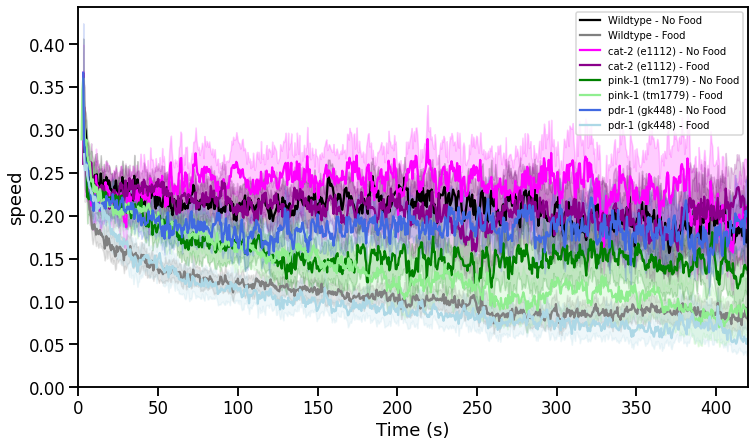

In [40]:
# Setting viewing range for your graph
top = 0.35
bottom = 0
left = 0
right = 420

sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(12,7))
plt.gca().xaxis.grid(False)
ax = sns.lineplot(x="time_bin", 
             y="speed", 
             data = FinalConcatenated,
             hue = 'Strain',
             palette = ['black',
                        'grey',
                        '#FF00FF',
                        '#8B008B',
                        'green',
                        'lightgreen',
                        'royalblue',
                        'lightblue',
#                         '#FFB5C5',
#                         '#CD6889'
                       ])
plt.xlabel("Time (s)")
# plt.ylabel("Speed (mm/s)")
# plt.title("Speed Trace")
# plt.ylim(top = top)
plt.ylim(bottom = bottom)
plt.xlim(left= left)
plt.xlim(right = right)
ax.legend(loc = 'upper right', fontsize = '10')
plt.savefig(f'Speed_Trace_{left}to{right}s.png', format='png', dpi=450)
plt.show()

# 8.3 Graphing Bar Graphs

In [ ]:
TotalConcatenated[['Genotype', 'Treatment']] = TotalConcatenated['Strain'].str.split(' - ', 1, expand=True)
# print(TotalConcatenated)

# Chunking Data (in Beta rn - only use for speed barplots)

In [ ]:
# df_mask = TotalConcatenated["time"] >= 60 and 

zerochunk0 = TotalConcatenated[TotalConcatenated["time"] >= 0]
zerochunk = zerochunk0[zerochunk0["time"] <= 10]
firstchunk0 = TotalConcatenated[TotalConcatenated["time"] >= 60]
firstchunk = firstchunk0[firstchunk0["time"] <= 80]
secondchunk0 = TotalConcatenated[TotalConcatenated["time"] >= 180]
secondchunk = secondchunk0[secondchunk0["time"] <= 200]
thirdchunk0 = TotalConcatenated[TotalConcatenated["time"] >= 300]
thirdchunk = thirdchunk0[thirdchunk0["time"] <= 320]

print("done")
# print(firstchunk)
# secondchunk = TotalConcatenated
# thirdchunk = TotalConcatenated


# Speed Barplots Comparison

<Figure size 432x288 with 0 Axes>

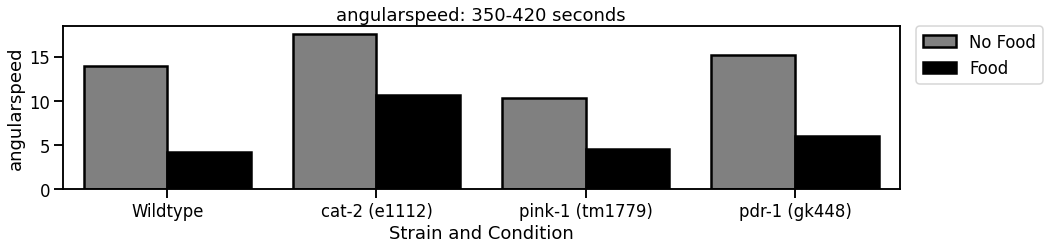

In [44]:
# Valid Measure Inputs:
# 1:'speed',
# 2: "x",
# 3: "y",
# 4: "angularspeed",
# 5: "pathlength",
# 6: "kink",
# 7: "bias",
# 8: "curve",
# 9: "dir",
# 10: "crab",
# 11: "length",
# 12: "midline",
# 13: "width",
# 14: "morphwidth",
# 15: "area"


start = 350
point = 420
var = "angularspeed"
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]

Title = f"{var}: {start}-{point} seconds" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(15, 3))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = var, 
             data = chunkeddata, #<--------------- Input Here -------------
             hue = 'Treatment',
             edgecolor="black",
             linewidth = 2.5,
#              seed=5,
             ci = None, # 'sd' for SD, '68' for SEM
             palette = ['grey',
                        'black'
                       ]
                )
plt.xlabel("Strain and Condition")
# plt.ylabel("Average Speed (mm/s)")
plt.title(Title)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

# Bias Barplots Comparison

<Figure size 432x288 with 0 Axes>

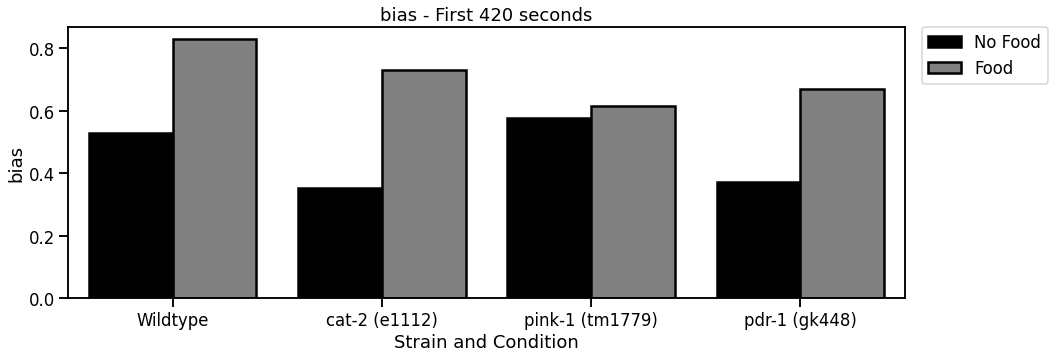

In [23]:
point = 420
var = "bias"
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= 0]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]

Title = f"{var} - First {point} seconds" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = var, 
             data = chunkeddata, #<--------------- Input Here -------------
             hue = 'Treatment',
             edgecolor="black",
             linewidth = 2.5,
             ci = None,
             palette = ['black',
                        'grey'
                       ]
                )
plt.xlabel("Strain and Condition")
# plt.ylabel("Average Speed (mm/s)")
plt.title(Title)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

# Dispersion Plot (starburst)

In [ ]:
timepoint=60 # <---------------------- indicate end timepoint


chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= 0]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= timepoint]

Title = f"0 - {timepoint} seconds" #<--------------------
sns.set(context="talk")
# sns.set_context("talk", fontscale=0.5)
plt.figure(linewidth = 2.5)
plt.figure(figsize=(16, 4))
g = sns.FacetGrid(chunkeddata, row = "Treatment", col = "Genotype", margin_titles=True) #<--------------------------
g.map_dataframe(sns.scatterplot, "x_0", "y_0", hue="time", palette = "YlOrBr", linewidth=0, alpha=0.7, s=2)
g.set_axis_labels("x position", "y position")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
# g.fig.subplots_adjust(top=0.8)
g.fig.suptitle(f"{Title} Dispersion map", y=1.05)
g.tight_layout()
# plt.savefig(f'{Title} Dispersion map.png', format='png', dpi=900, bbox_inches = 'tight')

# Total Distance Traveled Trace

In [ ]:
start=50
timepoint=360 # <---------------------- indicate end timepoint


chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= timepoint]

Title = f"{start} - {timepoint} seconds" #<--------------------
sns.set(context="talk")
# sns.set_context("talk", fontscale=0.5)
plt.figure(linewidth = 2.5)
plt.figure(figsize=(16, 4))
g = sns.FacetGrid(chunkeddata, row = "Treatment", col = "Genotype", margin_titles=True, ylim=[0,15]) #<---- set y-lim
g.map_dataframe(sns.scatterplot, "time", "distance", hue="worm", palette = "colorblind", linewidth=0, alpha=0.7, s=2)
# g.set_axis_labels("x position", "y position")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
# g.fig.subplots_adjust(top=0.8)
g.fig.suptitle(f'{Title} Total Distance Traveled Trace', y=1.05)
g.tight_layout()
# plt.savefig(f'{Title} Total Distance Traveled Trace.png', format='png', dpi=900, bbox_inches = 'tight')

# Done!